# Customer Churn Analysis
## Prathish Murugan
## GBM

In [2]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [3]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Churn\Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

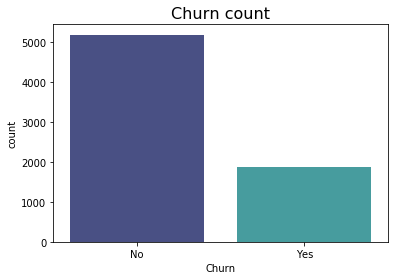

In [12]:
sns.countplot(data=df, x="Churn", palette="mako")
plt.title('Churn count', fontsize=16)
plt.show()

In [13]:
df_churn = df.copy()

df_churn.TotalCharges = pd.to_numeric(df_churn.TotalCharges, errors='coerce')
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
#11 missing values in TotalCharges column
df_churn.loc[df_churn['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
df_churn.dropna(how = 'any', inplace = True) 

In [16]:
df_churn.loc[df_churn ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
df_churn['tenure'].max()
# .cut() ==> Bin values into discrete intervals.

72

In [18]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df_churn['tenure_group'] = pd.cut(df_churn.tenure, range(1, 80, 12), right=False, labels=labels)

In [19]:
df_churn['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

In [20]:
df_churn.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [21]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


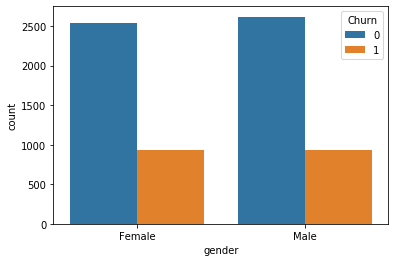

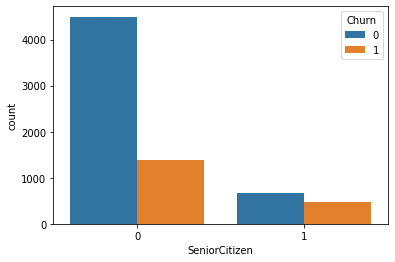

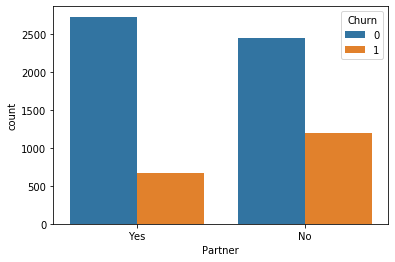

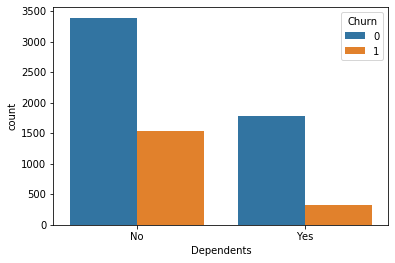

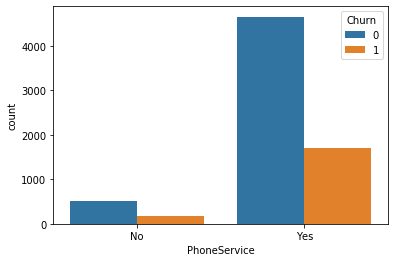

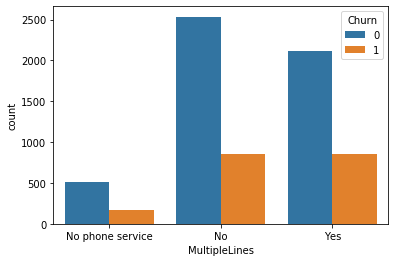

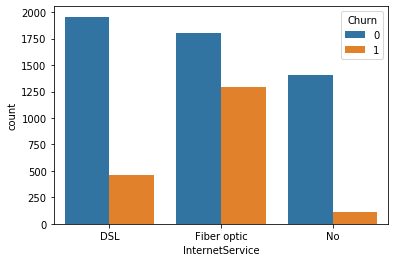

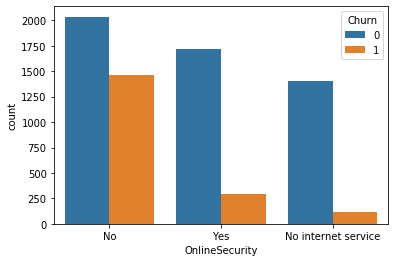

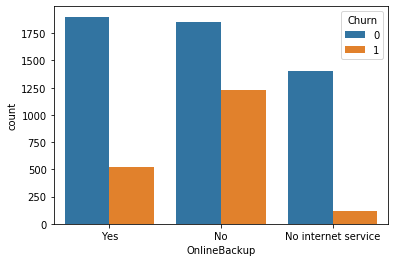

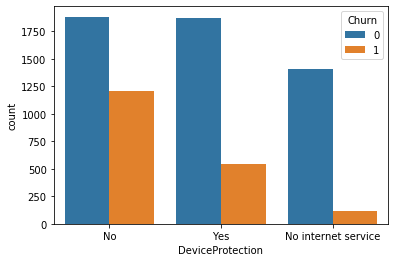

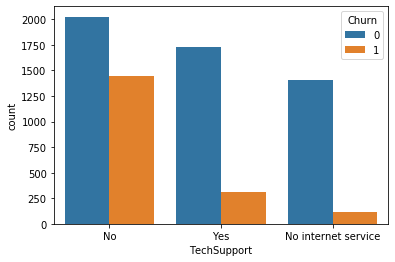

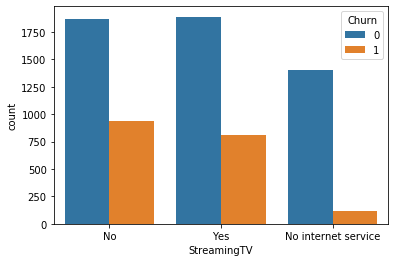

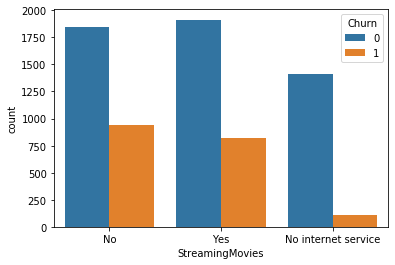

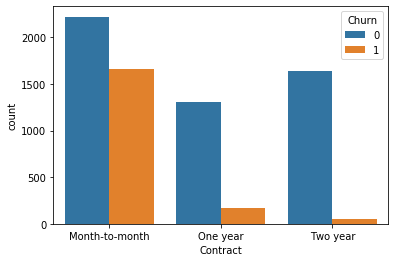

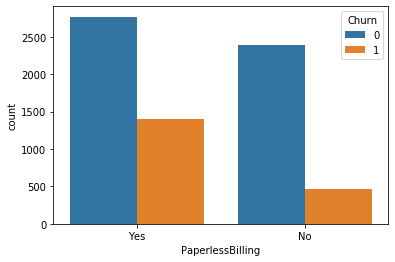

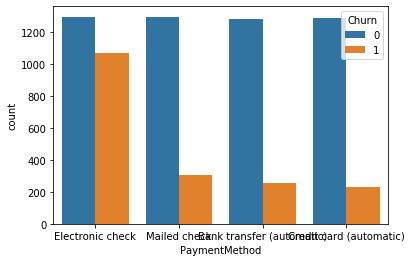

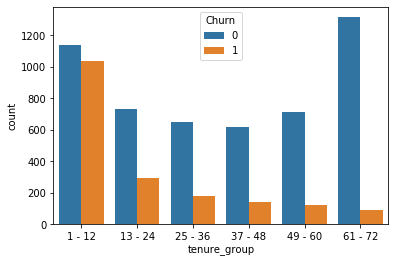

In [76]:
for i, predictor in enumerate(df_churn.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_churn, x=predictor, hue='Churn')

In [22]:
df_churn['Churn'] = np.where(df_churn.Churn == 'Yes',1,0)

In [23]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


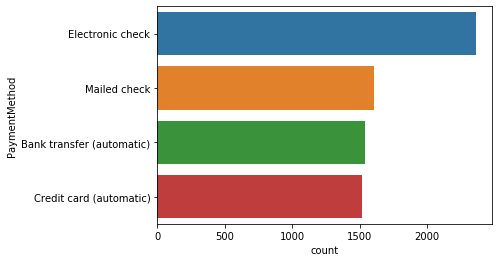

In [24]:
sns.countplot(data=df_churn, y="PaymentMethod")

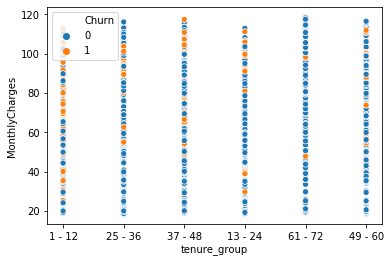

In [25]:
sns.scatterplot(x='tenure_group', y='MonthlyCharges', data= df_churn, hue='Churn')

In [26]:
df_dummies = pd.get_dummies(df_churn)

In [27]:
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


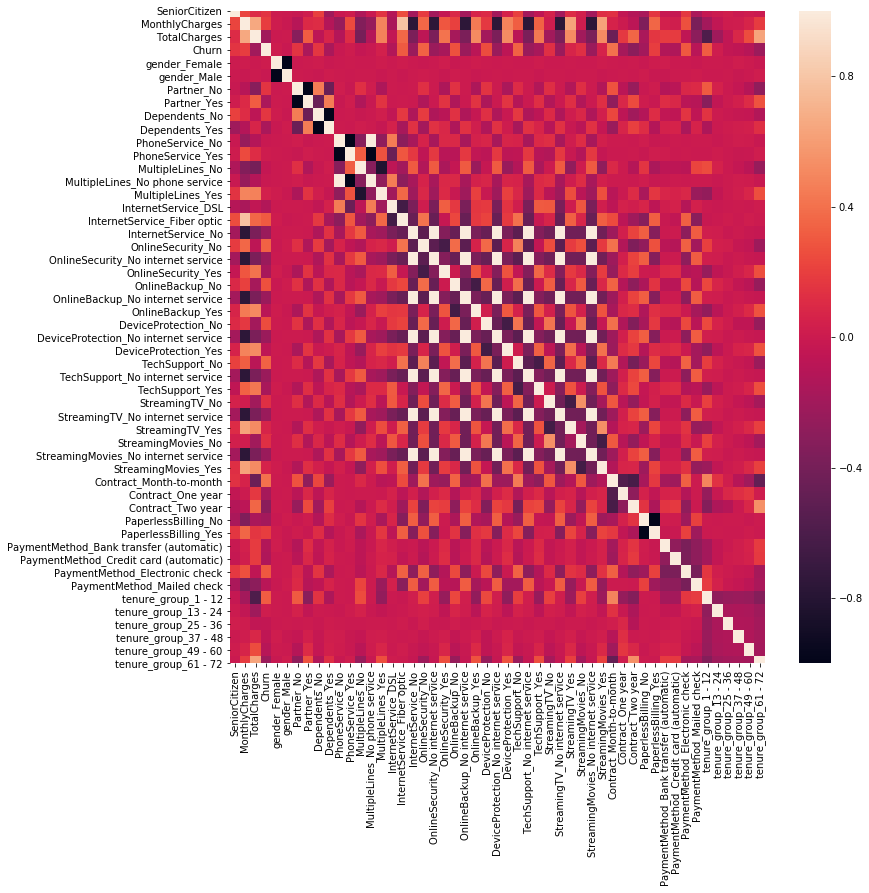

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr() )

In [32]:
x=df_dummies.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [31]:
y=df_dummies['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
before_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
before_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [35]:
y_pred=before_dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [36]:
before_dt.score(x_test,y_test)


0.7882018479033405

In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 60)

In [38]:
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = KNN, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7735121963553157
Standart Deviation Accuracies:  0.010282348118869765


In [40]:
KNN.fit(x_train,y_train) 
KNN.score(x_test, y_test)

0.775408670931059

In [41]:
from sklearn.svm import SVC

SVM = SVC(random_state=42)

#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standard Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7342228023488809
Standard Deviation Accuracies:  0.0006526424909767959


In [42]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(solver='liblinear', random_state=0)


In [43]:
LRmodel.fit(x_train,y_train) 
LRmodel.score(x_test, y_test)

0.8059701492537313

## SMOTEENN

In [44]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [45]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [46]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [48]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)

0.9457627118644067


In [49]:
print(metrics.classification_report(yr_test, yr_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       528
           1       0.95      0.95      0.95       652

    accuracy                           0.95      1180
   macro avg       0.94      0.95      0.95      1180
weighted avg       0.95      0.95      0.95      1180



In [52]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=10, criterion='gini', random_state = 100,max_depth=10, min_samples_leaf=8)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, n_estimators=10,
                       random_state=100)

In [53]:
y_pred=model_rf.predict(x_test)

In [54]:
model_rf.score(x_test,y_test)

0.8031272210376688

In [55]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [56]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [57]:
model_rf_smote=RandomForestClassifier(n_estimators=5, criterion='gini', random_state = 100,max_depth=10, min_samples_leaf=5)
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=5,
                       random_state=100)

In [58]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [59]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)
print(model_score_r1)

0.9359730412805392


In [60]:
KNNrm = KNeighborsClassifier(n_neighbors = 60)
accuraccierm = cross_val_score(estimator = model_rf_smote, X= xr_train1, y=yr_train1, cv=10)

In [61]:
print("Average Accuracies: ",np.mean(accuraccierm))
print("Standard Deviation Accuracies: ",np.std(accuraccierm))

Average Accuracies:  0.9371987563846323
Standard Deviation Accuracies:  0.012661713083476326


In [62]:
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       535
           1       0.94      0.94      0.94       652

    accuracy                           0.94      1187
   macro avg       0.94      0.94      0.94      1187
weighted avg       0.94      0.94      0.94      1187



In [63]:
import xgboost as xgb

In [64]:
xgregressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [65]:
xgregressor.fit(xr_train1,yr_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
yr_predict1 = xgregressor.predict(xr_test1)

In [67]:
model_score_r12 = xgregressor.score(xr_test1, yr_test1)
print(model_score_r12)

0.8292849285816125


In [68]:
import tensorflow as tf
from tensorflow import keras

In [69]:
len(xr_train1.columns)

50

In [70]:
model = keras.Sequential([
    keras.layers.Dense(50, input_shape=(50,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(xr_train1, yr_train1, epochs=100)

Epoch 1/100
149/149 [==============================] - 4s 2ms/step - loss: 1.6112 - accuracy: 0.7715
Epoch 2/100
149/149 [==============================] - 0s 1ms/step - loss: 0.5970 - accuracy: 0.8434
Epoch 3/100
149/149 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.8674
Epoch 4/100
149/149 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.8811
Epoch 5/100
149/149 [==============================] - 0s 1ms/step - loss: 0.5909 - accuracy: 0.8843
Epoch 6/100
149/149 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.9041
Epoch 7/100
149/149 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.9115
Epoch 8/100
149/149 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8988
Epoch 9/100
149/149 [==============================] - 0s 2ms/step - loss: 0.3708 - accuracy: 0.9028
Epoch 10/100
149/149 [==============================] - 0s 2ms/step - loss: 0.5913 - accura

149/149 [==============================] - 0s 1ms/step - loss: 0.2147 - accuracy: 0.9383
Epoch 81/100
149/149 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.9277
Epoch 82/100
149/149 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.9273
Epoch 83/100
149/149 [==============================] - 0s 2ms/step - loss: 0.7905 - accuracy: 0.8993
Epoch 84/100
149/149 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.9275
Epoch 85/100
149/149 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9408
Epoch 86/100
149/149 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.9290
Epoch 87/100
149/149 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.9279
Epoch 88/100
149/149 [==============================] - 0s 1ms/step - loss: 0.2615 - accuracy: 0.9302
Epoch 89/100
149/149 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 

In [71]:
yp = model.predict(xr_test1)
yp[:5]

array([[0.9977659 ],
       [0.01158142],
       [0.9425635 ],
       [0.05435583],
       [0.9985625 ]], dtype=float32)

In [72]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [73]:
y_pred[:10]

[1, 0, 1, 0, 1, 1, 1, 0, 1, 1]

In [74]:
yr_test1[:10]

2960    1
685     0
313     0
2054    0
3398    1
4444    1
5677    1
141     0
5106    1
5649    1
Name: Churn, dtype: int32

In [75]:
print(classification_report(yr_test1,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       535
           1       0.83      0.98      0.90       652

    accuracy                           0.88      1187
   macro avg       0.90      0.87      0.87      1187
weighted avg       0.89      0.88      0.88      1187



In [ ]:
#then pickle